In [1]:
%run geometria.ipynb

In [2]:
Tolerance = 10e-12

# Funkcje pomocnicze

In [3]:
# sprawdzanie, po której stronie odcinka leży punkt - funkcje pomocnicze
def det(a, b, c):
    return a[0] * b[1] + b[0] * c[1] + a[1] * c[0] - c[0] * b[1] - b[0] * a[1] - a[0] * c[1]

def orient(a, b, c):
    determinant = det(a, b, c)
    if determinant > Tolerance: # lewa strona
        return 1
    elif determinant < -Tolerance: # prawa strona
        return -1
    else: # współliniowe
        return 0
    
# sortowanie przy wykorzystaniu zmodyfikowanego algorytmu QuickSort

def dist(a, b):
    return np.sqrt((b[0] - a[0])** 2 + (b[1] - a[1])** 2) # odległość między dwoma punktami

def partition(arr, left, right, elem):
    rand_index = left
    arr[right], arr[rand_index] = arr[rand_index], arr[right]
    i = left
    p = arr[right]
    for j in range(left, right):
        if orient(elem, arr[j], p) == 1 or (orient(elem, arr[j],p) == 0 and dist(elem, arr[j]) > dist(elem, p)):
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
    arr[i], arr[right] = arr[right], arr[i]
    return i

def quicksort(arr, left, right, elem):
    if len(arr) <= 1: 
        return arr
    while left < right:
        pivot = partition(arr, left, right, elem)
        if pivot - left < right - pivot:
            quicksort(arr, left, pivot - 1, elem)
            left = pivot + 1 
        else:
            quicksort(arr, pivot + 1, right, elem)
            right = pivot - 1
    return arr

def quick_sort(arr, elem):
    return quicksort(arr, 0, len(arr) - 1, elem)

# szukanie najmniejszego punktu wśród posortowanych punktów
def get_min(points):
    elem = min(points, key = lambda x: (x[1], x[0]))
    idx = points.index(elem)
    return points.pop(idx)

# wizualizacja

def get_lines(s, scenes, points):
    lines = []
    for i in range(len(s)-1):
        lines.append([s[i], s[i+1]])
        
    lines.append([s[-1], s[0]])
    scene = Scene([PointsCollection(points, color = "thistle"),
                   PointsCollection(s, color = "hotpink")], 
                  [LinesCollection(lines, color = "hotpink")])
    
    scenes.insert(0,scene)
    return scenes

def add_scene(points, s, scenes, i):
    
    scenes.append(Scene([PointsCollection(points, color = "thistle"),
                PointsCollection(s.copy(), color = "hotpink"),
                PointsCollection([points[i]], color = "cyan")],
                [LinesCollection([(s[i], s[i + 1]) for i in range(len(s) - 1)], color = "hotpink"),
                LinesCollection([(points[i], s[-1])], color = "cyan")]))
    
    return scenes

# Główny algorytm

In [4]:
def Graham(points_):
    points = points_.copy()
    root = get_min(points)
    quick_sort(points, root)
    points.insert(0,root)
    scenes = []
    s = [points[0], points[1], points[2]]
    i = 3
    
    while i < len(points):
        
        result = orient(s[-2], s[-1], points[i])
        
        scenes = add_scene(points,s,scenes,i)
            
        if result == 1: # po lewej stronie
            s.append(points[i])
            i += 1
        elif result == 0: # współliniowo
            s.pop()
            s.append(points[i])
            i += 1
        else: # po prawej stronie
            s.pop()
    
    if orient(s[-2], s[-1], root) == 0: 
        s.pop()   
    
    scenes = get_lines(s, scenes,points)
    
    return scenes

# Testowanie

<IPython.core.display.Javascript object>


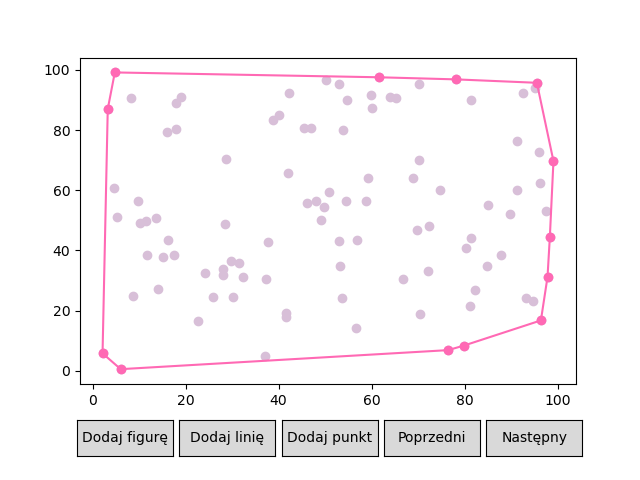

In [5]:
def generate_points(amount, low, high):
    a = np.random.rand(amount).astype(np.float64) * (high - low) + low
    b = np.random.rand(amount).astype(np.float64) * (high - low) + low
    return list(zip(a, b))

data = generate_points(100, 0, 100)
scenes = Graham(data)
plot = Plot(scenes=scenes)
plot.draw()

# Algorytm bez wizualizacji

Algorytm jest wykorzystywany w implementacji algorytmu Chana, w związku z czym potrzebna będzie implementacja bez wizualizacji.

In [6]:
def Graham_(points_):
    points = points_.copy()
    root = get_min(points)
    quick_sort(points, root)
    points.insert(0,root)
    s = [points[0], points[1], points[2]]
    i = 3
    
    while i < len(points):
        
        result = orient(s[-2], s[-1], points[i])
            
        if result == 1: # po lewej stronie
            s.append(points[i])
            i += 1
        elif result == 0: # współliniowo
            s.pop()
            s.append(points[i])
            i += 1
        else: # po prawej stronie
            s.pop()
    
    if orient(s[-2], s[-1], root) == 0: 
        s.pop()   
    
    return s